In [232]:
# importation des libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from statsmodels.tsa.arima.model import ARIMA



# lecture des données et mise en forme

df = pd.read_csv('BTC-USD.csv', encoding='utf-8')
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)


df.sort_values('Date',ascending=True)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2840,2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,20965695707
2841,2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,20280.634766,21381535161
2842,2022-06-29,20281.169922,20364.156250,19937.791016,20104.023438,20104.023438,23552740328
2843,2022-06-30,20108.312500,20141.160156,18729.656250,19784.726563,19784.726563,26267239923


Evolution du prix du BTC sur le temps

<AxesSubplot:xlabel='Date', ylabel='Close'>

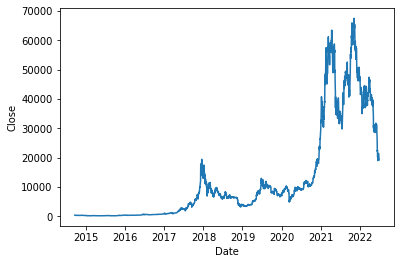

In [233]:
sns.lineplot(x=date,y=close)

Corrélation entre les valeurs

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999528,0.999112,0.998811,0.998811,0.724008
High,0.999528,1.000000,0.999043,0.999476,0.999476,0.727865
Low,0.999112,0.999043,1.000000,0.999389,0.999389,0.715739
Close,0.998811,0.999476,0.999389,1.000000,1.000000,0.722695
Adj Close,0.998811,0.999476,0.999389,1.000000,1.000000,0.722695
Volume,0.724008,0.727865,0.715739,0.722695,0.722695,1.000000


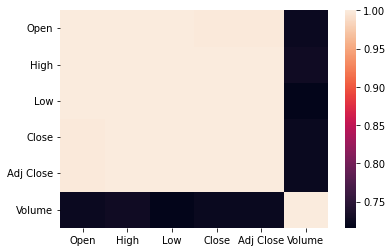

In [234]:
sns.heatmap(df.corr()) 
df.corr()

In [235]:
#  definition des colonnes features et target 

date = df["Date"]
close = df['Close']
volume = df['Volume']

features = volume
target = close
 
df = df[['Date','Close','Volume']]
df.head()

,Date,Close,Volume
0,2014-09-17,457.334015,21056800
1,2014-09-18,424.440002,34483200
2,2014-09-19,394.795990,37919700
3,2014-09-20,408.903992,36863600
4,2014-09-21,398.821014,26580100


Source et collecte des données : https://finance.yahoo.com/quote/BTC-USD/history/

Prix journalier du BTC du 17/09/2014 au 01/07/2022 ,4367 elements

Nous souhaitons prédire le prix du btc, notre target sera donc le dernier prix connu journalier (prix a la fermeture de la séance), il s'agit donc d'une variable quantitative continue


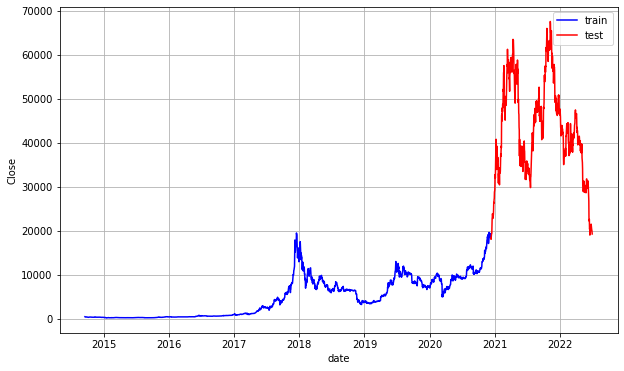

In [236]:
# Train test Split 

to_row = int(len(df)*0.8)

target_train_data = list(close[0:to_row] )
target_test_data = list(close[to_row:] )

plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('date')
plt.ylabel('Close')
plt.plot(date[0:to_row],target_train_data,'blue',label='train')
plt.plot(date[to_row:],target_test_data,"red",label='test')
plt.legend()





In [239]:
predictions = []
n_test_obser = len(target_test_data)


model = ARIMA(target_train_data, order = (4,1,0)).fit()
output = model.forecast()

print(model.summary())
    
    



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2276
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -16150.151
Date:                Wed, 03 Aug 2022   AIC                          32310.301
Time:                        13:03:02   BIC                          32338.950
Sample:                             0   HQIC                         32320.752
                               - 2276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0142      0.007      1.905      0.057      -0.000       0.029
ar.L2         -0.0206      0.009     -2.379      0.017      -0.038      -0.004
ar.L3         -0.0046      0.009     -0.486      0.6